### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set and on for every next 7 days)
### Total infected cases, total fatalities, total recovered

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

Start importing files in folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', '03-08-2020.csv', '03-09-2020.csv', '03-10-2020.csv', '03-11-2020.csv', '03-12-2020.csv', '03-13-2020.csv', '03-14-2020.csv',

In [2]:
today_is=files[-2].split('.')[0]
today_is

'12-10-2020'

### Number of covid-19 outbreak days 

In [3]:
from covid import *
len(x_dat)

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


324

In [4]:
# StartML.searchByValue(data[289], try_keys=['Country_Region', 'Country/Region'], value='US')['Confirmed'].values, len(data)

### Total CONFIRMED cases in the World changed by week

[(1, 5578), (2, 23892), (3, 44803), (4, 75138), (5, 80415), (6, 92848), (7, 118598), (8, 197211), (9, 418113), (10, 857923), (11, 1426552), (12, 1976591), (13, 2549771), (14, 3116427), (15, 3662697), (16, 4262244), (17, 4897905), (18, 5589883), (19, 6386387), (20, 7242778), (21, 8174226), (22, 9264435), (23, 10476532), (24, 11830759), (25, 13325526), (26, 14948404), (27, 16692175), (28, 18547784), (29, 20358574), (30, 22159324), (31, 23915487), (32, 25779779), (33, 27603682), (34, 29595692), (35, 31645898), (36, 33685723), (37, 35851172), (38, 38176639), (39, 40841209), (40, 44028236), (41, 47505771), (42, 51532970), (43, 55679709), (44, 59801016), (45, 63883941), (46, 68225723), (47, 69592554)]


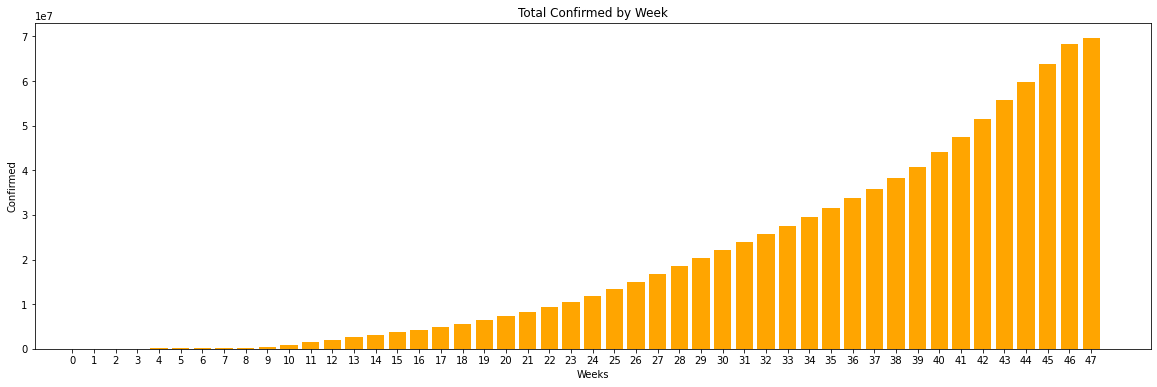

In [5]:
x_weeks = [week for week, value in confirmedByWeek]
y_cases = [value for week, value in confirmedByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed by Week")
plt.savefig('output/week_totalconfirmed.jpg')
print(confirmedByWeek)

Increasing by Week: 
 [5578, 18314, 20911, 30335, 5277, 12433, 25750, 78613, 220902, 439810, 568629, 550039, 573180, 566656, 546270, 599547, 635661, 691978, 796504, 856391, 931448, 1090209, 1212097, 1354227, 1494767, 1622878, 1743771, 1855609, 1810790, 1800750, 1756163, 1864292, 1823903, 1992010, 2050206, 2039825, 2165449, 2325467, 2664570, 3187027, 3477535, 4027199, 4146739, 4121307, 4082925, 4341782, 1366831]

Week: 5 with lowest confirmed cases: 5277

Week: 46 with highest confirmed cases: 4341782

Average confirmed by Week until now:  1480692.6382978724


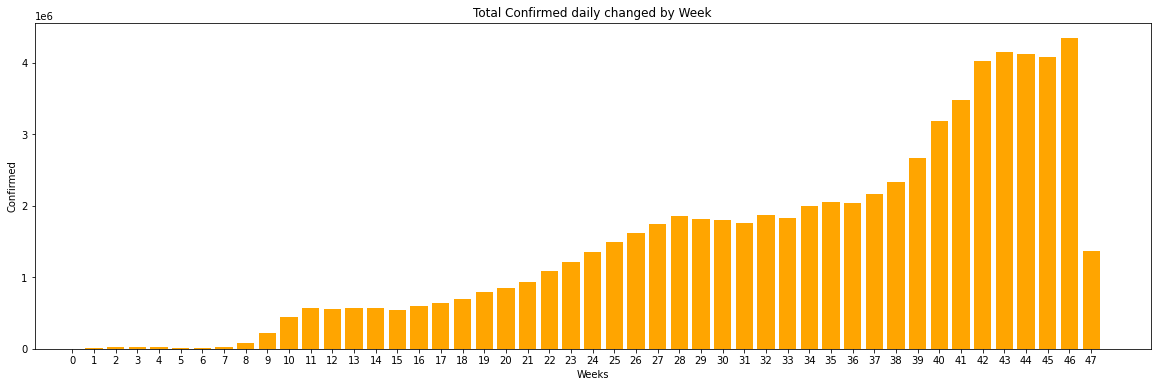

In [6]:
y_cases = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
print("Increasing by Week: \n", y_cases)
print("\nWeek:", np.argmin(y_cases)+1, "with lowest confirmed cases:", y_cases[np.argmin(y_cases)])
print("\nWeek:", np.argmax(y_cases)+1, "with highest confirmed cases:", y_cases[np.argmax(y_cases)])
print("\nAverage confirmed by Week until now: ", np.mean(y_cases))
plt.title("Total Confirmed daily changed by Week")
plt.savefig('output/week_totalconfirmed_weekly.jpg')
# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total FATALITIES cases in the World changed by week

[(1, 131), (2, 492), (3, 1113), (4, 2007), (5, 2708), (6, 3160), (7, 4262), (8, 7905), (9, 18616), (10, 42110), (11, 81879), (12, 125995), (13, 176589), (14, 217158), (15, 257241), (16, 291967), (17, 323288), (18, 350457), (19, 380390), (20, 411443), (21, 443696), (22, 477588), (23, 511268), (24, 544186), (25, 578689), (26, 616498), (27, 659715), (28, 700885), (29, 742868), (30, 781240), (31, 819695), (32, 857302), (33, 897773), (34, 935316), (35, 971371), (36, 1008438), (37, 1050443), (38, 1086713), (39, 1125346), (40, 1167507), (41, 1214850), (42, 1274464), (43, 1338608), (44, 1409690), (45, 1481305), (46, 1556834), (47, 1581856)]


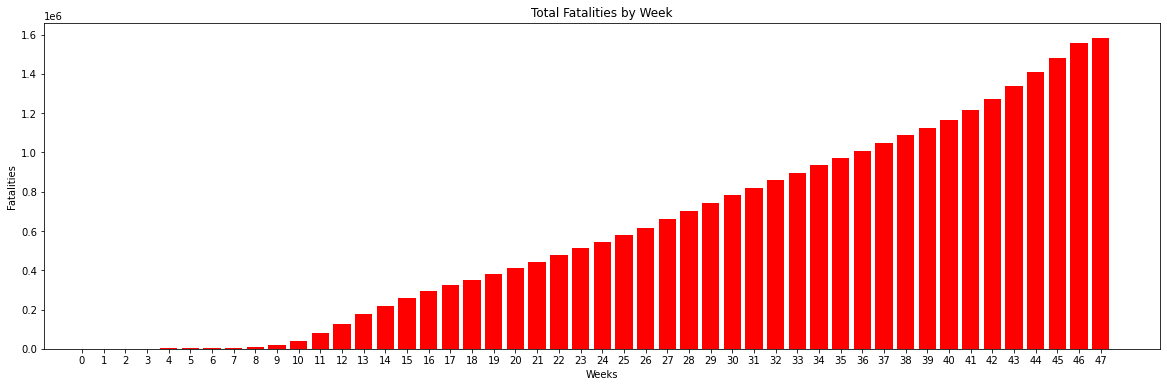

In [7]:
x_weeks = [week for week, value in deathsByWeek]
y_cases = [value for week, value in deathsByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities by Week")
plt.savefig('output/week_totalfatalities.jpg')
print(deathsByWeek)

Increasing by Week: 
 [131, 361, 621, 894, 701, 452, 1102, 3643, 10711, 23494, 39769, 44116, 50594, 40569, 40083, 34726, 31321, 27169, 29933, 31053, 32253, 33892, 33680, 32918, 34503, 37809, 43217, 41170, 41983, 38372, 38455, 37607, 40471, 37543, 36055, 37067, 42005, 36270, 38633, 42161, 47343, 59614, 64144, 71082, 71615, 75529, 25022]

Week: 1 with lowest fatalities cases:  131

Week: 46 with highest fatalities cases:  75529

Average fatalities by Week:  33656.51063829787


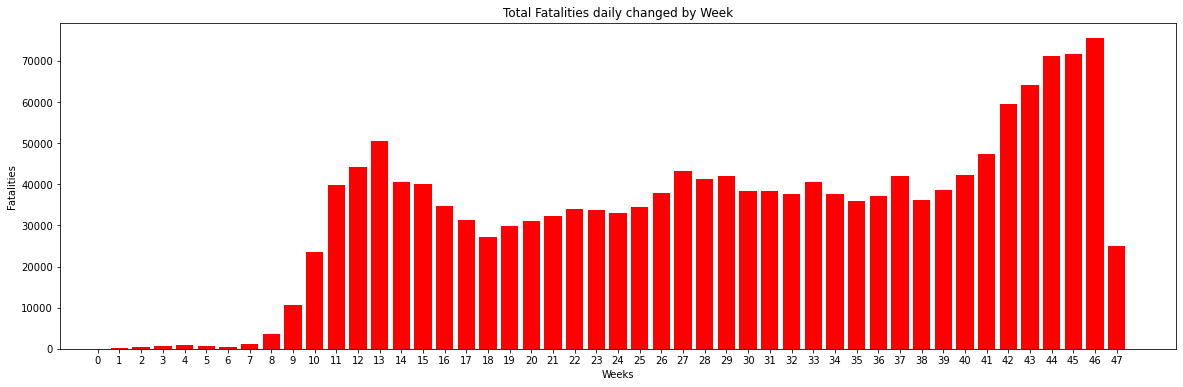

In [8]:
y_cases = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
print("Increasing by Week: \n", y_cases)
print("\nWeek:", np.argmin(y_cases)+1, "with lowest fatalities cases: ", y_cases[np.argmin(y_cases)])
print("\nWeek:", np.argmax(y_cases)+1, "with highest fatalities cases: ", y_cases[np.argmax(y_cases)])
print("\nAverage fatalities by Week: ", np.mean(y_cases))
plt.title("Total Fatalities daily changed by Week")
plt.savefig('output/week_totalfatalities_weekly.jpg')
# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total RECOVERED cases in the World changed by week

[(1, 107), (2, 852), (3, 4683), (4, 14352), (5, 27905), (6, 48228), (7, 64400), (8, 80832), (9, 107677), (10, 178014), (11, 300343), (12, 474617), (13, 680415), (14, 929025), (15, 1198923), (16, 1493520), (17, 1839039), (18, 2286845), (19, 2729402), (20, 3375617), (21, 3955246), (22, 4630464), (23, 5352658), (24, 6447116), (25, 7399363), (26, 8467496), (27, 9721616), (28, 11138909), (29, 12589712), (30, 14117685), (31, 15568917), (32, 17080246), (33, 18532081), (34, 20088998), (35, 21727172), (36, 23424013), (37, 25012360), (38, 26501524), (39, 27933992), (40, 29816649), (41, 31637087), (42, 33573921), (43, 35812932), (44, 38297736), (45, 41034926), (46, 43956174), (47, 44871360)]


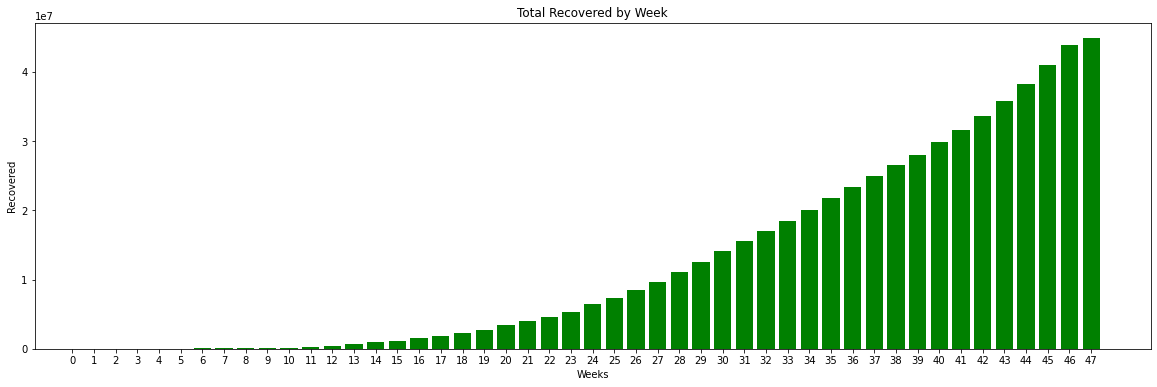

In [9]:
x_weeks = [week for week, value in recoveredByWeek]
y_cases = [value for week, value in recoveredByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered by Week")
plt.savefig('output/week_totalrecovered.jpg')
print(recoveredByWeek)

Increasing by Week: 
 [107, 745, 3831, 9669, 13553, 20323, 16172, 16432, 26845, 70337, 122329, 174274, 205798, 248610, 269898, 294597, 345519, 447806, 442557, 646215, 579629, 675218, 722194, 1094458, 952247, 1068133, 1254120, 1417293, 1450803, 1527973, 1451232, 1511329, 1451835, 1556917, 1638174, 1696841, 1588347, 1489164, 1432468, 1882657, 1820438, 1936834, 2239011, 2484804, 2737190, 2921248, 915186]

Week: 1 with lowest recovered cases: 107

Week: 46 with highest recovered cases: 2921248

Average recovered by Week:  954709.7872340425


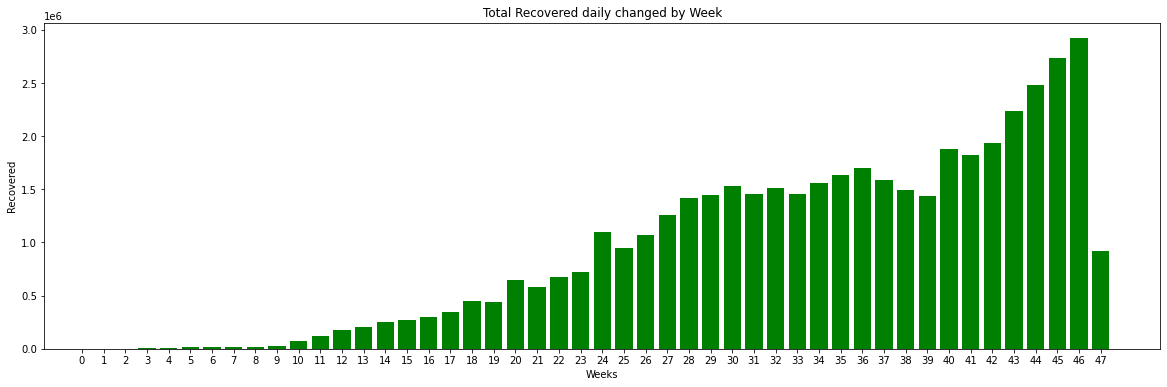

In [10]:
y_cases = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
print("Increasing by Week: \n", y_cases)

print("\nWeek:", np.argmin(y_cases)+1, "with lowest recovered cases:", y_cases[np.argmin(y_cases)])
print("\nWeek:", np.argmax(y_cases)+1, "with highest recovered cases:", y_cases[np.argmax(y_cases)])
print("\nAverage recovered by Week: ", np.mean(y_cases))
plt.title("Total Recovered daily changed by Week")
plt.savefig('output/week_totalrecovered_weekly.jpg')
# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1